In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
# Load datasets
train_file = "train_data.txt"
test_file = "test_data.txt"
train_df = pd.read_csv(train_file, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
test_df = pd.read_csv(test_file, sep=':::', names=['Id', 'Title', 'Description'], engine='python')


In [3]:

train_df.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
test_df.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [10]:
train_df.describe()



,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [12]:
test_df.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

In [13]:

train_df.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [14]:
train_df.count()

Title          54214
Genre          54214
Description    54214
dtype: int64

In [15]:
test_df.count()

Id             54200
Title          54200
Description    54200
dtype: int64

In [16]:

train_df.iloc[0:3]

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


In [17]:
test_df.shape

(54200, 3)

In [18]:
train_df.shape

(54214, 3)

C:\Users\sneha\AppData\Local\Temp\ipykernel_12648\2768918181.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')


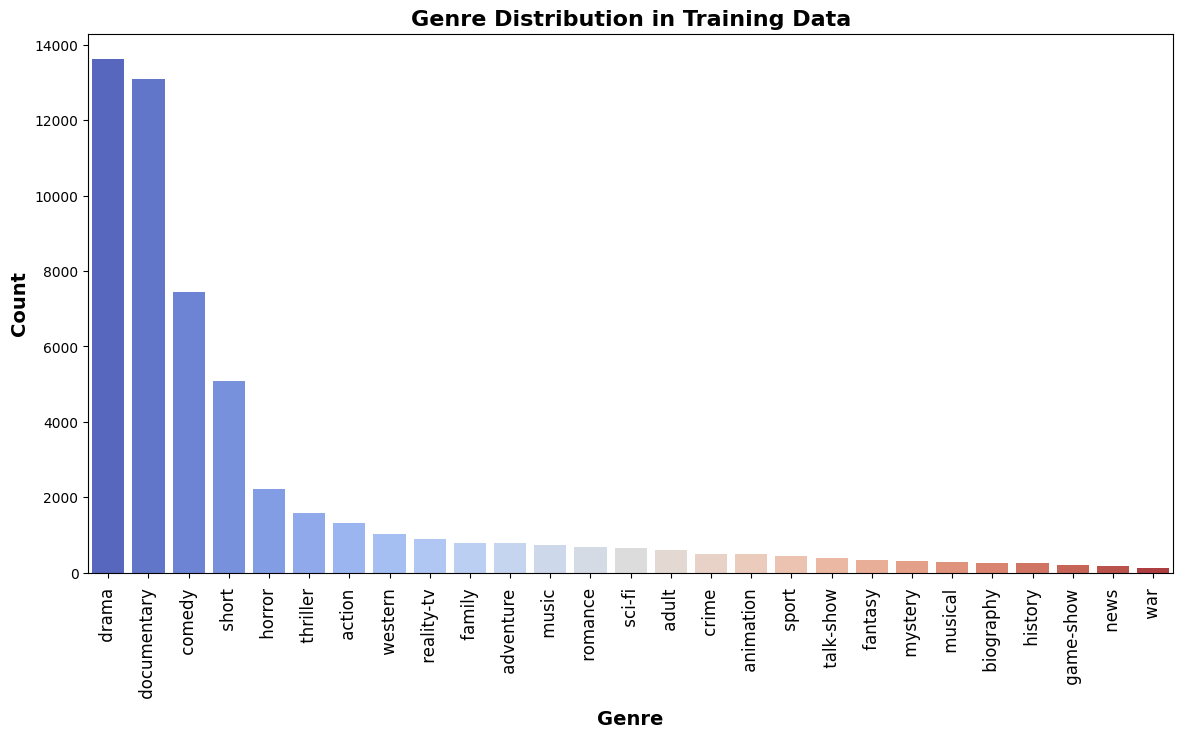

In [19]:
#Data visulization
plt.figure(figsize=(14, 7))
genre_counts = train_df['Genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Genre Distribution in Training Data', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.show()


In [20]:
#stemmer and stop words
lancaster_stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

In [21]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)  
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r"[^a-zA-Z+']", ' ', text) 
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  
    text = "".join([char for char in text if char not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([word for word in words if word not in stop_words and len(word) > 2])
    return re.sub("\s[\s]+", " ", text).strip()


<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sneha\AppData\Local\Temp\ipykernel_12648\1416844799.py:10: SyntaxWarning: invalid escape sequence '\s'
  return re.sub("\s[\s]+", " ", text).strip()


In [22]:
train_df['Cleaned_Description'] = train_df['Description'].apply(preprocess_text)



In [23]:
test_df['Cleaned_Description'] = test_df['Description'].apply(preprocess_text)

In [24]:
train_df['Cleaned_Length'] = train_df['Cleaned_Description'].apply(len)



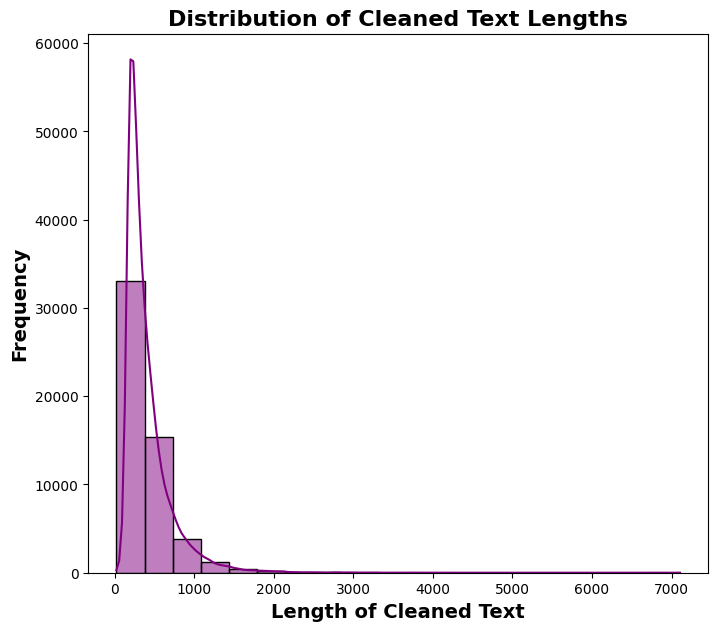

In [25]:
plt.figure(figsize=(8, 7))
sns.histplot(data=train_df, x='Cleaned_Length', bins=20, kde=True, color='purple')
plt.xlabel('Length of Cleaned Text', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Cleaned Text Lengths', fontsize=16, fontweight='bold')
plt.show()

In [26]:
# TF-IDF vectorizer
tfidf_vect = TfidfVectorizer()


In [27]:
X_train_matrix = tfidf_vect.fit_transform(train_df['Cleaned_Description'])
X_test_matrix = tfidf_vect.transform(test_df['Cleaned_Description'])

In [28]:
# Split the data into training and validation sets
X = X_train_matrix
y = train_df['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
#  Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# predictions 
val_predictions = nb_classifier.predict(X_val)

# Evaluate the model
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)
print(classification_report(y_val, val_predictions))



Validation Accuracy: 0.4451720003689016


c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.62      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# Make predictions on the test data using  Multinomial Naive Bayes classifier
test_predictions = nb_classifier.predict(X_test_matrix)
test_df['Predicted_Genre'] = test_predictions

# Display the movie names and their predicted genres
results_df = pd.DataFrame({
    'Movie Title': test_df['Title'],
    'Predicted Genre': test_df['Predicted_Genre']
})

print(results_df)

                            Movie Title Predicted Genre
0                 Edgar's Lunch (1998)           drama 
1             La guerra de papá (1977)           drama 
2          Off the Beaten Track (2010)     documentary 
3               Meu Amigo Hindu (2015)           drama 
4                    Er nu zhai (1955)           drama 
...                                 ...             ...
54195   "Tales of Light & Dark" (2013)           drama 
54196      Der letzte Mohikaner (1965)           drama 
54197              Oliver Twink (2007)           drama 
54198                Slipstream (1973)           drama 
54199        Curitiba Zero Grau (2010)     documentary 

[54200 rows x 2 columns]


In [31]:
 #Logistic Regression classifier
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train, y_train)

# Make predictions 
val_predictions = log_reg_classifier.predict(X_val)

# Evaluate the model
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)
print(classification_report(y_val, val_predictions))




c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.5822189430969289


c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.58      0.23      0.33       263
       adult        0.84      0.19      0.31       112
   adventure        0.49      0.13      0.20       139
   animation        0.67      0.02      0.04       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.59      0.56      1443
       crime        1.00      0.01      0.02       107
 documentary        0.65      0.86      0.74      2659
       drama        0.53      0.81      0.64      2697
      family        0.47      0.05      0.10       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.92      0.30      0.45        40
     history        0.00      0.00      0.00        45
      horror        0.67      0.56      0.61       431
       music        0.66      0.39      0.49       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
# Make predictions on the test data Logistic Regression classifier
test_predictions = log_reg_classifier.predict(X_test_matrix)
test_df['Predicted_Genre'] = test_predictions

# Display the movie names and their predicted genres
results_df = pd.DataFrame({
    'Movie Title': test_df['Title'],
    'Predicted Genre': test_df['Predicted_Genre']
})

print(results_df)

                            Movie Title Predicted Genre
0                 Edgar's Lunch (1998)           drama 
1             La guerra de papá (1977)           drama 
2          Off the Beaten Track (2010)     documentary 
3               Meu Amigo Hindu (2015)           drama 
4                    Er nu zhai (1955)           drama 
...                                 ...             ...
54195   "Tales of Light & Dark" (2013)           drama 
54196      Der letzte Mohikaner (1965)           drama 
54197              Oliver Twink (2007)          comedy 
54198                Slipstream (1973)           drama 
54199        Curitiba Zero Grau (2010)     documentary 

[54200 rows x 2 columns]
